In [1]:
import sys
sys.path.append('../Base/')

from imports import *
from sequential_models import FCQ, Cnn_model
from training_startegy import EGreedyExpStrategy, GreedyStrategy
from env import get_make_env_fn

from Base import ReplayBuffer
from dqn import DQN
from env_image import getImage
from conf import *

#vdisplay = Xvfb(width=1280, height=740, colordepth=16)
#vdisplay.start()

In [2]:
dqn_results = []
log.info(environment_settings)
for seed in SEEDS:

    #Neural Net
    value_model_fn = lambda nS, nA: FCQ(nS, nA, hidden_dims = model_hidden_layers)
    if from_pixel:
        value_model_fn = lambda nS, nA: Cnn_model(nS, nA)

    #Optimizer
    value_optimizer_fn = lambda net, lr: optim.RMSprop(net.parameters(), lr=lr)

    #Training Strategy
    training_strategy_fn = lambda: EGreedyExpStrategy(init_epsilon=init_epsilon,  
                                                      min_epsilon=min_epsilon, 
                                                      decay_steps=decay_steps)
    #Testing Strategy
    evaluation_strategy_fn = lambda: GreedyStrategy()

    #Memory
    replay_buffer_fn = lambda: ReplayBuffer(max_size=max_size, batch_size=batch_size)
    
    #Environment
    env_name, gamma, max_minutes, \
    max_episodes, goal_mean_100_reward = environment_settings.values()

    #Agent with all above functions
    agent = DQN(replay_buffer_fn,
                value_model_fn,
                value_optimizer_fn,
                value_optimizer_lr,
                training_strategy_fn,
                evaluation_strategy_fn,
                n_warmup_batches,
                update_target_every_steps)

    make_env_fn, make_env_kargs = get_make_env_fn(env_name=env_name)

    #Taining the agent!!!
    result= agent.train(
        make_env_fn, make_env_kargs, seed, gamma, max_minutes, max_episodes, goal_mean_100_reward, from_pixel, get_image_fn = lambda env: getImage(env))

    dqn_results.append(result)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 64, 79, 119]           4,160
       BatchNorm2d-2          [-1, 64, 79, 119]             128
            Conv2d-3           [-1, 64, 38, 58]          65,600
       BatchNorm2d-4           [-1, 64, 38, 58]             128
            Conv2d-5           [-1, 64, 18, 28]          36,928
       BatchNorm2d-6           [-1, 64, 18, 28]             128
            Linear-7                  [-1, 512]      16,515,584
            Linear-8                  [-1, 256]         131,328
            Linear-9                   [-1, 64]          16,448
           Linear-10                    [-1, 2]             130
Total params: 16,770,562
Trainable params: 16,770,562
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.59
Forward/backward pass size (MB): 11.83
Params size (MB): 63.97
Est

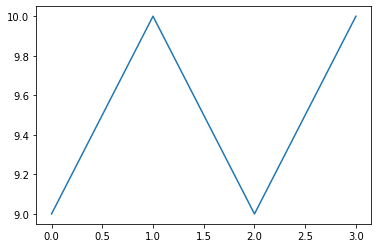

In [3]:
total_reward = agent.st_ep_reward
plt.plot(total_reward)


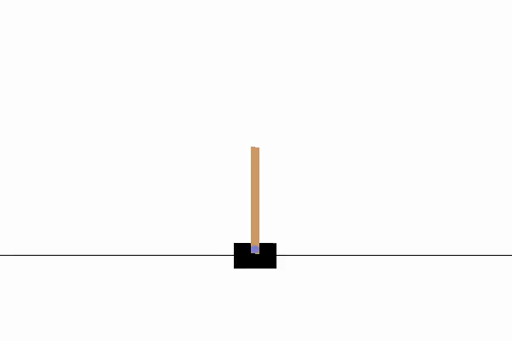
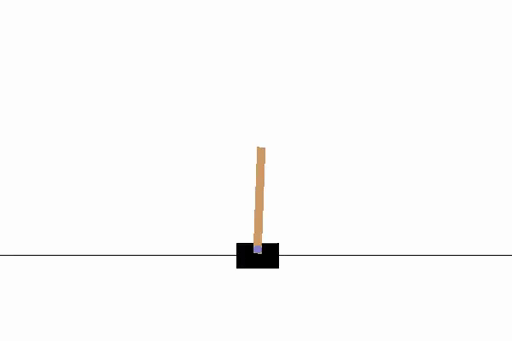
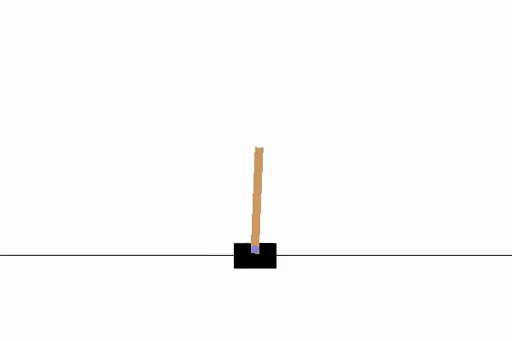

In [4]:
agent.demo_progression()

In [5]:
result

{'time': array([0.        , 0.        , 0.        , 2.23007393]),
 'reward': array([ 9., 10.,  9., 10.])}

In [6]:
np.save('my_file.npy', result) 


In [7]:
read_dictionary = np.load('my_file.npy',allow_pickle='TRUE')

In [8]:
read_dictionary.item()

{'time': array([0.        , 0.        , 0.        , 2.23007393]),
 'reward': array([ 9., 10.,  9., 10.])}

In [ ]:
a = 